Importing Libraries


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Reading Data

In [28]:
data = pd.read_csv('raw_house_data.csv')

Drop Duplicates

In [29]:
data = data.drop_duplicates()

In [30]:
data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

Drop Columns

In [31]:
data.drop('MLS', axis=1, inplace=True)

In [32]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [33]:
data.isnull().sum()


,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6
sqrt_ft,56


As most of the Columns are skewed , we are using median to fill the null values

In [34]:
data['lot_acres'] = data['lot_acres'].fillna(data['lot_acres'].median())
median = data['lot_acres'].median()
data['lot_acres'] = data['lot_acres'].replace(0, median)

In [35]:
median_year = data['year_built'].median()
data['year_built'] = data['year_built'].replace(0, median_year)

In [36]:
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

In [37]:
data['sqrt_ft'] = data['sqrt_ft'].fillna(data['sqrt_ft'].median())

In [38]:
data['garage'] = data['garage'].fillna(data['garage'].median())

In [39]:
data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce')
median_HOA = data['HOA'].median()
data['HOA'] = data['HOA'].replace(np.nan,median_HOA)

In [40]:
data['kitchen_features'] = data['kitchen_features'].fillna('unknown')
data['floor_covering'] = data['floor_covering'].fillna('unknown')

In [41]:
data.isnull().sum()

,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0
sqrt_ft,0


In [42]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0


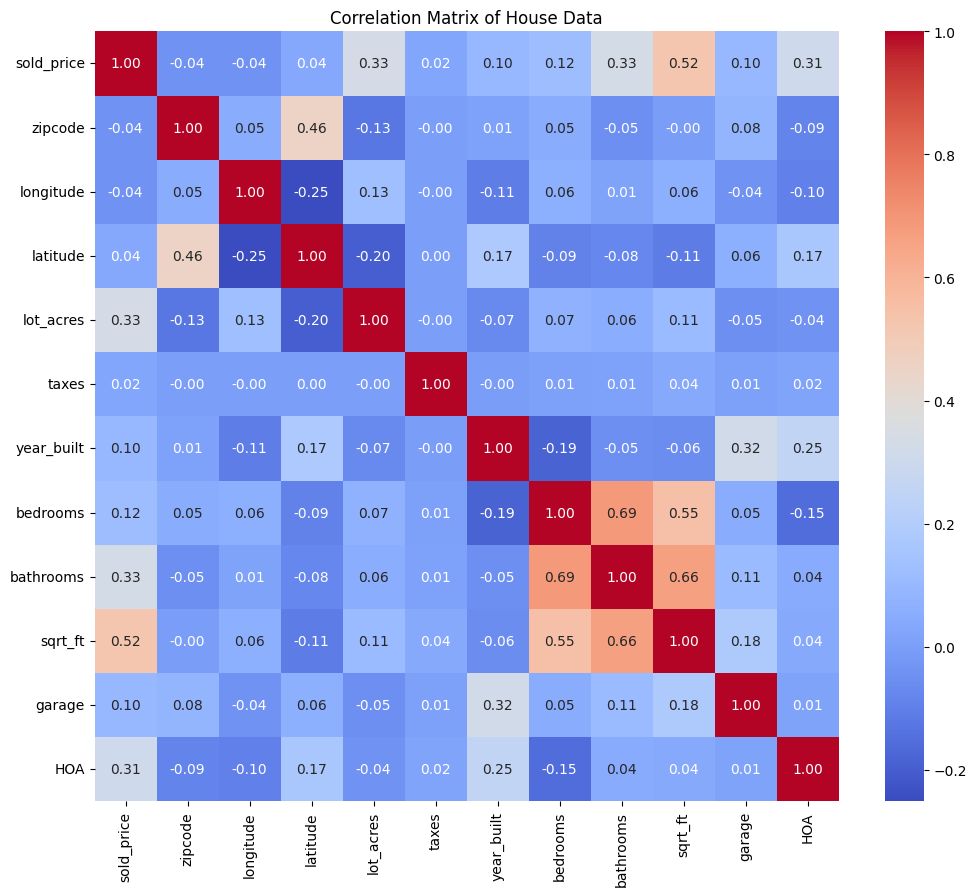

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Data')
plt.show()

Converting the Fireplace to Bianry

In [44]:
print(data['fireplaces'].unique())

['6' '5' '4' '1' '2' '3' '7' '0' '9' ' ' '8']


In [45]:
def fireplace_to_binary(x):
    try:
        x_float = float(x)
        return 0 if x_float == 0 else 1
    except:
        s = str(x).strip().lower()
        if s in ["none", "no", "nan", "0", ""]:
            return 0
        return 1

data["fireplaces"] = data["fireplaces"].apply(fireplace_to_binary)


In [46]:

data.drop('kitchen_features', axis=1, inplace=True)


In [47]:
def count_floor_types(x):
    if pd.isna(x) or x == "":
        return 0
    return len([i.strip() for i in str(x).split(',')])

data["floor_covering_count"] = data["floor_covering"].apply(count_floor_types)
data.drop(columns=["floor_covering"], inplace=True)

In [48]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,floor_covering_count
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,1,0.0,2
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,1,0.0,2
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,1,55.0,2
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,1,55.0,3
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,1,55.0,2


Removing Outliers in sold_price

The identified outliers are not data errors but represent genuinely high-value properties. The application of log transformation has effectively mitigated the statistical impact of these extreme values, making their retention appropriate for modeling without unduly influencing the model's sensitivity to their absolute magnitude.

In [49]:
data.shape

(5000, 14)

Spliting the Data and Normalizing the data

In [50]:
data['log_sqrt_ft'] = np.log1p(data['sqrt_ft'])
data['log_lot_acres'] = np.log1p(data['lot_acres'])
data['log_taxes'] = np.log1p(data['taxes'])
data['log_sold_price'] = np.log1p(data['sold_price'])



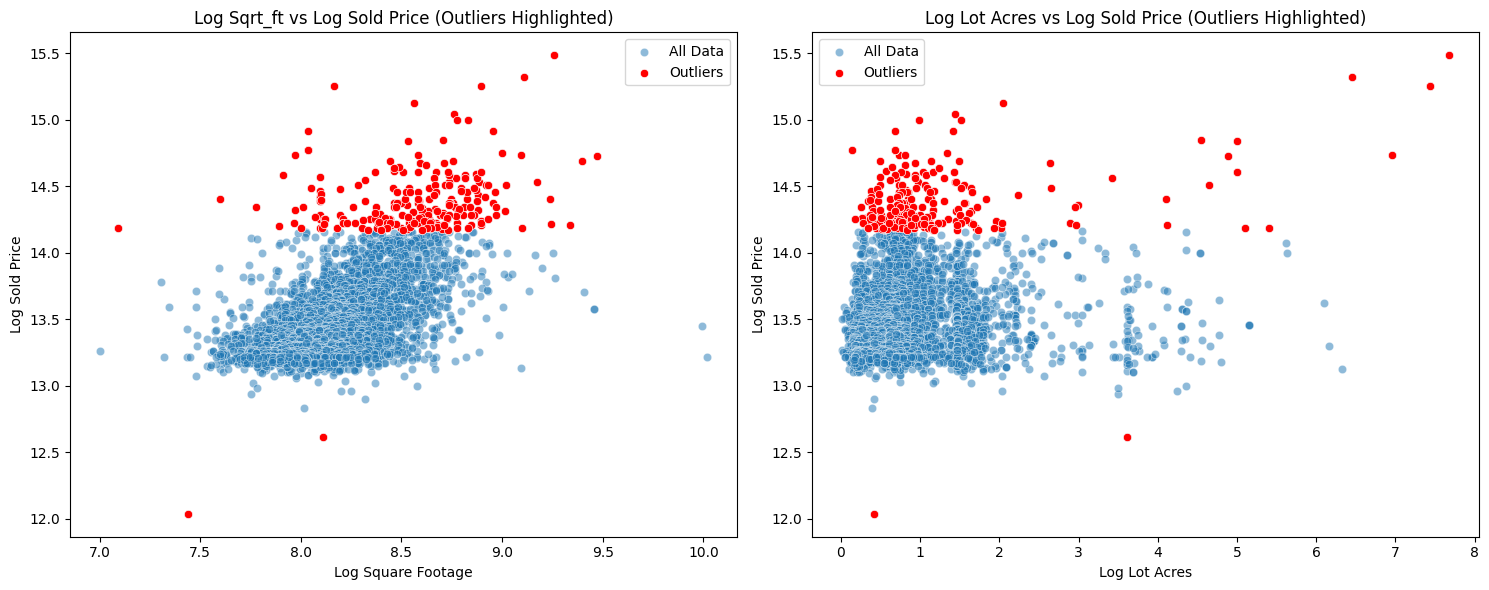

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR for log_sold_price
Q1 = data['log_sold_price'].quantile(0.25)
Q3 = data['log_sold_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_df = data[(data['log_sold_price'] < lower_bound) | (data['log_sold_price'] > upper_bound)]

plt.figure(figsize=(15, 6))

# Scatter plot for log_sqrt_ft vs log_sold_price
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['log_sqrt_ft'], y=data['log_sold_price'], alpha=0.5, label='All Data')
sns.scatterplot(x=outliers_df['log_sqrt_ft'], y=outliers_df['log_sold_price'], color='red', label='Outliers')
plt.title('Log Sqrt_ft vs Log Sold Price (Outliers Highlighted)')
plt.xlabel('Log Square Footage')
plt.ylabel('Log Sold Price')
plt.legend()

# Scatter plot for log_lot_acres vs log_sold_price
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['log_lot_acres'], y=data['log_sold_price'], alpha=0.5, label='All Data')
sns.scatterplot(x=outliers_df['log_lot_acres'], y=outliers_df['log_sold_price'], color='red', label='Outliers')
plt.title('Log Lot Acres vs Log Sold Price (Outliers Highlighted)')
plt.xlabel('Log Lot Acres')
plt.ylabel('Log Sold Price')
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
target = "log_sold_price"

numeric_features = [
    "longitude", "latitude", "log_lot_acres",
   "bedrooms","log_sqrt_ft",'year_built',
    "garage"
]

X_num_df = data[numeric_features]
y = data[target].to_numpy().astype(float)

Test Train Split

In [53]:
def train_test_split_manual(N, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(N)
    test_n = int(N * test_size)
    test_idx = indices[:test_n]
    train_idx = indices[test_n:]
    return train_idx, test_idx

N = len(data)
train_idx, test_idx = train_test_split_manual(N, test_size=0.2, seed=42)

X_num_train = X_num_df.iloc[train_idx].to_numpy().astype(float)
X_num_test  = X_num_df.iloc[test_idx].to_numpy().astype(float)


y_train = y[train_idx]
y_test  = y[test_idx]

Scaling

In [54]:
num_mean = X_num_train.mean(axis=0)
num_std  = X_num_train.std(axis=0)
num_std[num_std == 0] = 1.0

X_num_train_scaled = (X_num_train - num_mean) / num_std
X_num_test_scaled  = (X_num_test  - num_mean) / num_std

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [56]:

X_train_design = np.hstack([np.ones((X_num_train_scaled.shape[0], 1)), X_num_train_scaled])
X_test_design  = np.hstack([np.ones((X_num_test_scaled.shape[0], 1)),  X_num_test_scaled])

print("Design matrix shape (train):", X_train_design.shape)


Design matrix shape (train): (4000, 8)


In [57]:
def OLS(Y, Y_hat, N):
  return np.sum((Y_hat - Y)**2) / N

class MVLinearRegression():
  def fit(self,X,y,eta=1e-3,epochs=1e-3,show_curve=True):
    epochs=int(epochs)
    N,D = X.shape
    Y=y
    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)
    #Start Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat,N)
      #weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("Cost ($\\mathcal{J}$)")
  def predict(self,X):
    return X@self.W

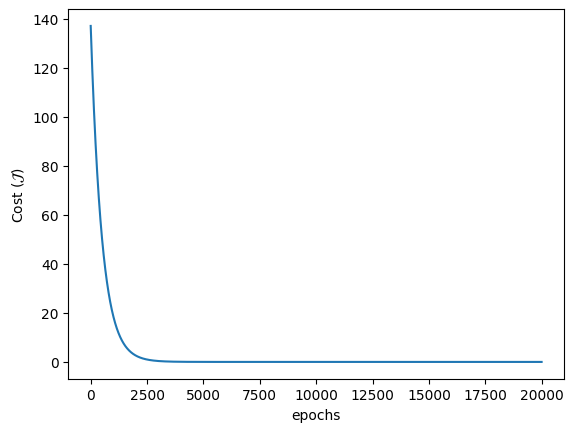

In [58]:
my_reg = MVLinearRegression()
my_reg.fit(X_train_design, y_train, eta=1e-3, epochs=20000, show_curve=True)

In [59]:
y_pred = my_reg.predict(X_test_design)

In [60]:
def MAE(Y, Y_hat):
    return np.mean(np.abs(Y - Y_hat))

def R2(Y, Y_hat):
    return 1 - (np.sum((Y - Y_hat)**2) / np.sum((Y - np.mean(Y))**2))

def OLS(Y, Y_hat):
    N = len(Y)
    return (1/(2*N)) * np.sum((Y - Y_hat)**2)


In [61]:
y_pred_log = my_reg.predict(X_test_design)

mae_log = MAE(y_test, y_pred_log)
r2_log = R2(y_test, y_pred_log)

y_pred_original_scale = np.expm1(y_pred_log)
y_test_original_scale = np.expm1(y_test)

mae_original_scale = MAE(y_test_original_scale, y_pred_original_scale)
r2_original_scale = R2(y_test_original_scale, y_pred_original_scale)

print(f"Metrics on Log-Transformed Data:")
print(f"  Mean Absolute Error (MAE): {mae_log:.4f}")
print(f"  R-squared (R2): {r2_log:.4f}")
print("\nMetrics on Original Price Scale:")
print(f"  Mean Absolute Error (MAE): {mae_original_scale:,.2f}")
print(f"  R-squared (R2): {r2_original_scale:.4f}")

Metrics on Log-Transformed Data:
  Mean Absolute Error (MAE): 0.1768
  R-squared (R2): 0.4079

Metrics on Original Price Scale:
  Mean Absolute Error (MAE): 152,065.90
  R-squared (R2): 0.3645


In [62]:


numeric_features = [
    "longitude", "latitude", "log_lot_acres",
    "year_built", "bedrooms",
    "log_sqrt_ft", "garage",
]

# Create log features if not already present
if "log_sqrt_ft" not in data.columns:
    data["log_sqrt_ft"] = np.log1p(data["sqrt_ft"])

if "log_lot_acres" not in data.columns:
    data["log_lot_acres"] = np.log1p(data["lot_acres"])

if "log_sold_price" not in data.columns:
    data["log_sold_price"] = np.log1p(data["sold_price"])

X_num_df = data[numeric_features]
y = data["log_sold_price"].to_numpy(dtype=float)

def train_test_split_manual(N, test_size=0.2, seed=42):
    np.random.seed(seed)
    idx = np.random.permutation(N)
    test_n = int(N * test_size)
    return idx[test_n:], idx[:test_n]   # train_idx, test_idx

N = len(data)
train_idx, test_idx = train_test_split_manual(N)

X_num_train = X_num_df.iloc[train_idx].to_numpy(dtype=float)

# Scale params from train
num_mean = X_num_train.mean(axis=0)
num_std  = X_num_train.std(axis=0)
num_std[num_std == 0] = 1.0  # avoid div by zero


In [63]:
def predict_house_price(model, feats, num_mean, num_std):
    log_lot_acres = np.log1p(feats["lot_acres"])
    log_sqrt_ft   = np.log1p(feats["sqrt_ft"])

    # Must match numeric_features order
    x = np.array([
        feats["longitude"],
        feats["latitude"],
        log_lot_acres,
         feats['year_built'],
        feats["bedrooms"],
        log_sqrt_ft,
        feats["garage"],
    ], dtype=float).reshape(1, -1)

    x_scaled = (x - num_mean) / num_std

    x_design = np.hstack([np.ones((1, 1)), x_scaled])

    log_price = model.predict(x_design)[0]

    return np.expm1(log_price)


In [64]:
example_house = {
    "longitude": -110.9,
    "latitude":  32.3,
    "lot_acres": 0.5,
    "year_built": 2000,
    "bedrooms": 3,
    "sqrt_ft": 2500,
    "garage": 2

}

pred_price = predict_house_price(my_reg, example_house, num_mean, num_std)
print(f"Predicted house price: ${pred_price:,.2f}")


Predicted house price: $581,263.94


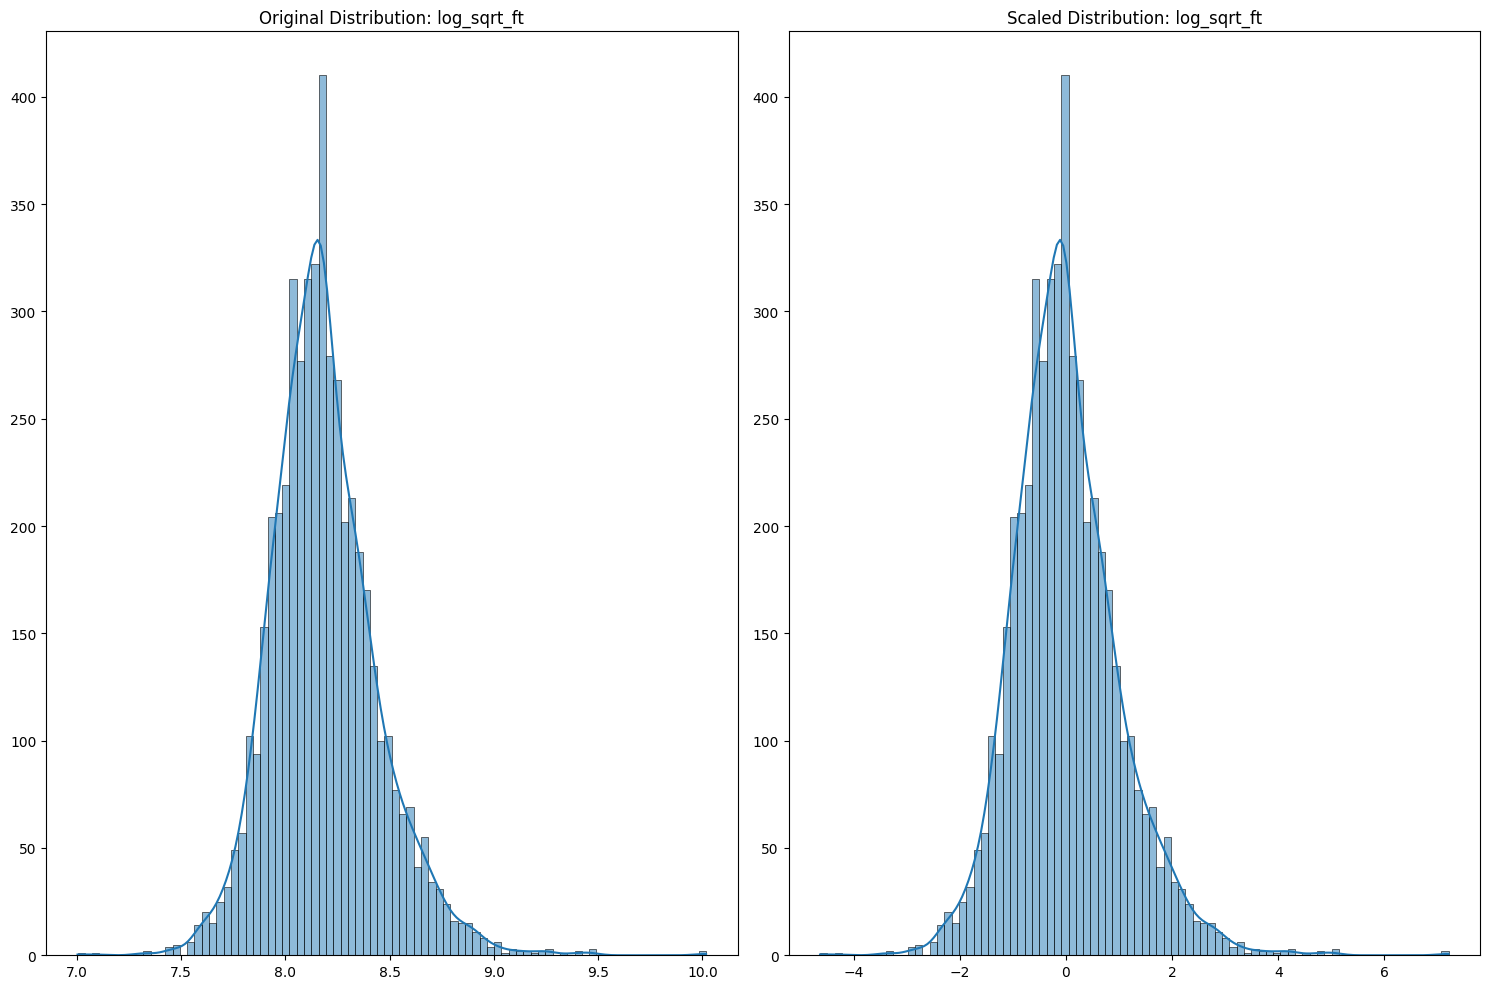

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot_scaled = ['log_sqrt_ft']

data_scaled_viz = (X_num_df[features_to_plot_scaled] - num_mean[X_num_df.columns.get_indexer(features_to_plot_scaled)]) / num_std[X_num_df.columns.get_indexer(features_to_plot_scaled)]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot_scaled):
    plt.subplot(len(features_to_plot_scaled), 2, 2*i + 1)
    sns.histplot(X_num_df[feature], kde=True)
    plt.title(f'Original Distribution: {feature}')
    plt.xlabel('')
    plt.ylabel('')

    plt.subplot(len(features_to_plot_scaled), 2, 2*i + 2)
    sns.histplot(data_scaled_viz[feature], kde=True)
    plt.title(f'Scaled Distribution: {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

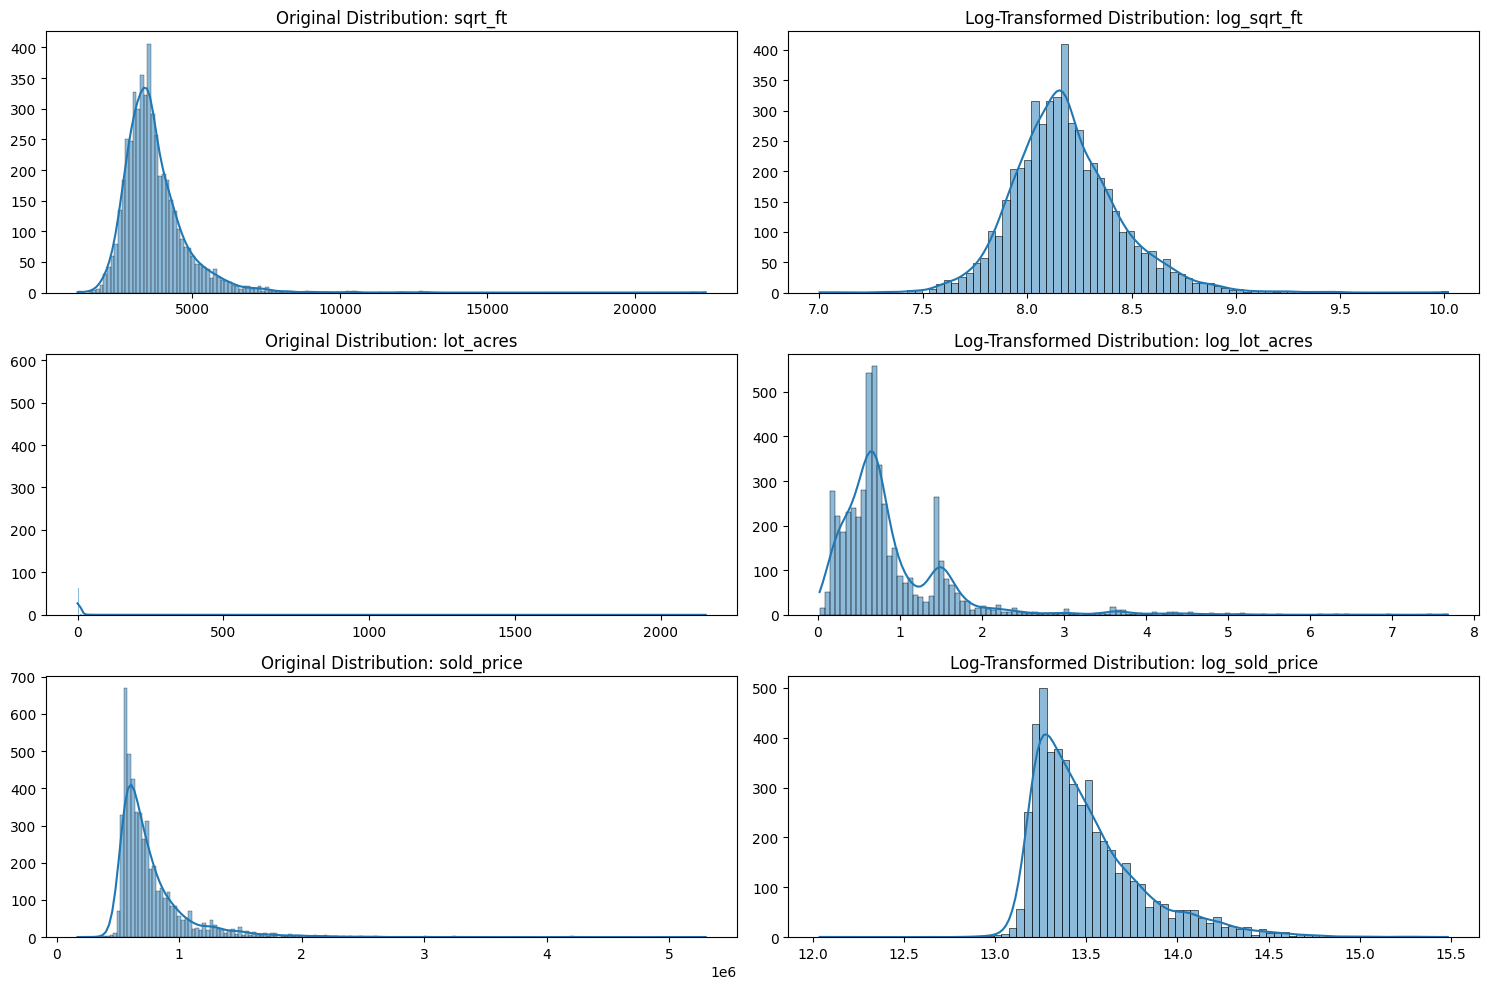

In [66]:
features_to_log_plot = ['sqrt_ft', 'lot_acres', 'sold_price']
log_features_map = {
    'sqrt_ft': 'log_sqrt_ft',
    'lot_acres': 'log_lot_acres',
    'sold_price': 'log_sold_price'
}

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_log_plot):
    # Original Distribution
    plt.subplot(len(features_to_log_plot), 2, 2*i + 1)
    sns.histplot(data[feature], kde=True) # Use 'data' DataFrame for original features
    plt.title(f'Original Distribution: {feature}')
    plt.xlabel('')
    plt.ylabel('')

    # Log-Transformed Distribution
    plt.subplot(len(features_to_log_plot), 2, 2*i + 2)
    sns.histplot(data[log_features_map[feature]], kde=True) # Use pre-computed log-transformed columns
    plt.title(f'Log-Transformed Distribution: {log_features_map[feature]}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

KNN regression

In [67]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,floor_covering_count,log_sqrt_ft,log_lot_acres,log_taxes,log_sold_price
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,1,0.0,2,9.259226,7.675546,8.570355,15.483218
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,1,0.0,2,8.895767,7.443078,9.251805,15.250595
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,1,55.0,2,8.164226,7.443078,9.257510,15.250595
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,1,55.0,3,9.107200,6.457821,9.038315,15.319588
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,1,55.0,2,8.763584,1.437463,9.641733,15.042648


In [68]:
for col in ['sqrt_ft','taxes']:
  data = data[data[col] < data[col].quantile(0.99)]
data = data.reset_index(drop=True)

In [69]:

data["house_age"] = 2025 - data["year_built"]
data["log_price"] = np.log1p(data["sold_price"])

feature_cols = [
    "longitude",
    "latitude",
    "sqrt_ft",
    "lot_acres",
    "house_age"
]

X_reg = data[feature_cols].to_numpy().astype(float)
y_log_reg = data["log_price"].to_numpy().astype(float)
y_price_reg = data["sold_price"].to_numpy().astype(float)


In [70]:
def train_test_split_manual(N, test_size=0.2, seed=42):
    np.random.seed(seed)
    idx = np.random.permutation(N)
    test_n = int(N * test_size)
    test_idx = idx[:test_n]
    train_idx = idx[test_n:]
    return train_idx, test_idx

N = len(X_reg)
train_idx, test_idx = train_test_split_manual(N, test_size=0.2, seed=42)

X_train_reg, X_test_reg         = X_reg[train_idx], X_reg[test_idx]
y_train_log_reg, y_test_log_reg = y_log_reg[train_idx], y_log_reg[test_idx]
y_train_price_reg, y_test_price_reg = y_price_reg[train_idx], y_price_reg[test_idx]

In [71]:
mean_reg = X_train_reg.mean(axis=0)
std_reg  = X_train_reg.std(axis=0)
std_reg[std_reg == 0] = 1.0

X_train_scaled_reg = (X_train_reg - mean_reg) / std_reg
X_test_scaled_reg  = (X_test_reg  - mean_reg) / std_reg

In [72]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]

      weights = 1 / (np.sqrt(dist2[idxt]) + epsilon)
      gamma_k = weights / weights.sum()

      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [73]:

knn_regressor = KNNRegressor()
knn_regressor.fit(X_train_scaled_reg, y_train_log_reg)

Ks = [3, 5, 7, 9, 11, 15]
results = []

for K in Ks:
    y_pred_log = knn_regressor.predict(X_test_scaled_reg, K=K)
    r2_log = R2(y_test_log_reg, y_pred_log)

    y_pred_price = np.expm1(y_pred_log)
    r2_price = R2(y_test_price_reg, y_pred_price)
    mae_price = MAE(y_test_price_reg, y_pred_price)

    results.append((K, r2_log, r2_price, mae_price))


for K, r2_log, r2_price, mae_price in results:
    print(f"K = {K:2d}| R² (price): {r2_price:.4f} | MAE: {mae_price:,.2f}")

K =  3| R² (price): 0.5336 | MAE: 118,425.60
K =  5| R² (price): 0.6000 | MAE: 112,488.20
K =  7| R² (price): 0.6089 | MAE: 111,425.52
K =  9| R² (price): 0.6105 | MAE: 111,005.70
K = 11| R² (price): 0.6074 | MAE: 111,607.87
K = 15| R² (price): 0.5968 | MAE: 112,599.07


In [74]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]

      weights = 1 / (np.sqrt(dist2[idxt]) + epsilon)
      gamma_k = weights / weights.sum()

      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

def predict_house_price(longitude, latitude, sqrt_ft, lot_acres, year_built,
                        K=7, mean=mean_reg, std=std_reg, model=knn_regressor):

    house_age = 2025 - year_built

    x = np.array([
        longitude,
        latitude,
        sqrt_ft,
        lot_acres,
        house_age
    ], dtype=float).reshape(1, -1)
    x_scaled = (x - mean) / std
    y_pred_log = model.predict(x_scaled, K=K)[0]
    predicted_price = np.expm1(y_pred_log)

    return predicted_price


print("\n Example House Prediction: ")
price_est = predict_house_price(
    longitude = -110.91,
    latitude  = 32.33,
    sqrt_ft    = 6299,
    lot_acres = 0.86,
    year_built= 2005,
    K=7

)

print(f"Predicted Price for example house: ${price_est:,.0f}")


 Example House Prediction: 
Predicted Price for example house: $1,638,468


KNN Classification

In [75]:
classification_data = data[['latitude', 'longitude', 'sqrt_ft', 'sold_price']].copy()
classification_data.head()

,latitude,longitude,sqrt_ft,sold_price
0,31.594213,-111.045371,7300.0,4200000.0
1,31.594844,-111.040707,3512.0,4200000.0
2,32.285162,-110.813768,6396.0,3411450.0
3,32.327575,-110.837950,6480.0,3250000.0
4,31.562121,-111.045441,5067.0,2776518.0


In [76]:
classification_data['price_per_sqft'] = classification_data['sold_price'] / classification_data['sqrt_ft']

In [77]:
string_nan = ["None","none","NULL","null","NaN","nan",""]
classification_data = classification_data.replace(string_nan, np.nan)

In [78]:
bins_price_per_sqft = classification_data['price_per_sqft'].quantile([0, 0.33, 0.66, 1.0])
labels_price_per_sqft = ["Low", "Medium", "High"]
classification_data['price_per_sqft_range'] = pd.cut(classification_data['price_per_sqft'], bins=bins_price_per_sqft, labels=labels_price_per_sqft, include_lowest=True)
classification_data.head(200)

,latitude,longitude,sqrt_ft,sold_price,price_per_sqft,price_per_sqft_range
0,31.594213,-111.045371,7300.0,4200000.0,575.342466,High
1,31.594844,-111.040707,3512.0,4200000.0,1195.899772,High
2,32.285162,-110.813768,6396.0,3411450.0,533.372420,High
3,32.327575,-110.837950,6480.0,3250000.0,501.543210,High
4,31.562121,-111.045441,5067.0,2776518.0,547.960924,High
...,...,...,...,...,...,...
195,31.611914,-111.033993,5914.0,1295000.0,218.971931,Medium
196,32.461126,-110.987649,3339.0,1494392.0,447.556754,High
197,32.280510,-110.825940,4580.0,1450000.0,316.593886,High
198,31.594518,-111.040290,6884.0,1200000.0,174.317257,Low


In [79]:
X_clf = classification_data[["longitude", "latitude"]].values
y_clf = classification_data["price_per_sqft_range"].cat.codes.values

print("Shape of X_clf:", X_clf.shape)
print("Shape of y_clf:", y_clf.shape)
print("First 5 values of y_clf:", y_clf[:5])

Shape of X_clf: (4900, 2)
Shape of y_clf: (4900,)
First 5 values of y_clf: [2 2 2 2 2]


In [80]:
from sklearn.model_selection import train_test_split
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

In [81]:
print("Price per Sqft Ranges:")
for i in range(len(labels_price_per_sqft)):
    lower_bound = bins_price_per_sqft.iloc[i]
    upper_bound = bins_price_per_sqft.iloc[i+1]
    print(f"{labels_price_per_sqft[i]}: ${lower_bound:,.2f} - ${upper_bound:,.2f} per sqft")

Price per Sqft Ranges:
Low: $78.95 - $183.91 per sqft
Medium: $183.91 - $219.39 per sqft
High: $219.39 - $1,208.33 per sqft


In [82]:
print("Count of points in each price per sqft range:")
print(classification_data['price_per_sqft_range'].value_counts())

Count of points in each price per sqft range:
price_per_sqft_range
High      1665
Medium    1618
Low       1617
Name: count, dtype: int64


In [83]:
from sklearn.preprocessing import StandardScaler

scaler_clf = StandardScaler()
X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
X_clf_test_scaled = scaler_clf.transform(X_clf_test)

print("Shape of X_clf_train_scaled:", X_clf_train_scaled.shape)
print("Shape of X_clf_test_scaled:", X_clf_test_scaled.shape)

Shape of X_clf_train_scaled: (3920, 2)
Shape of X_clf_test_scaled: (980, 2)


In [84]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):
      N = len(X)
      y_hat = np.zeros(N)

      for i in range(N):
          dist2 = np.sum((self.X - X[i])**2, axis=1)
          idxt = np.argsort(dist2)[:K]
          gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
          y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

      return y_hat

knn_classifier = KNNClassifier()
knn_classifier.fit(X_clf_train_scaled, y_clf_train)

In [85]:
y_pred_clf = knn_classifier.predict(X_clf_test_scaled, K=5)

accuracy = np.mean(y_pred_clf == y_clf_test)
print("Custom KNN Accuracy:", accuracy)

Custom KNN Accuracy: 0.5326530612244897


In [86]:
for K in [3,5,7,9,11]:
    temp_knn_classifier = KNNClassifier()
    temp_knn_classifier.fit(X_clf_train_scaled, y_clf_train)
    acc = np.mean(temp_knn_classifier.predict(X_clf_test_scaled, K) == y_clf_test)
    print(K, acc)

3 0.5326530612244897
5 0.5326530612244897
7 0.5469387755102041
9 0.5479591836734694
11 0.5357142857142857


In [87]:
def predict_price_per_sqft_range(longitude, latitude, K=7, model=knn_classifier, scaler=scaler_clf):
    new_point = np.array([[longitude, latitude]])
    new_point_scaled = scaler.transform(new_point)
    pred_code = model.predict(new_point_scaled, K)

    mapping = {0: "Low", 1: "Medium", 2: "High"}
    return mapping[int(pred_code[0])]


example_prediction = predict_price_per_sqft_range(longitude=-110.4, latitude=31.55,K=7)
print(f"Predicted price per sqft range for example house: {example_prediction}")

Predicted price per sqft range for example house: Low
